## scikit-learn中的多项式回归和pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree = 2) #最大次数为2
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
X[:5, :]

array([[-2.46895281],
       [ 2.57545762],
       [ 0.9510182 ],
       [-0.89042279],
       [-1.11077801]])

In [7]:
X2[:5, :] #第一列是x的0次方

array([[ 1.        , -2.46895281,  6.09572799],
       [ 1.        ,  2.57545762,  6.63298195],
       [ 1.        ,  0.9510182 ,  0.90443562],
       [ 1.        , -0.89042279,  0.79285274],
       [ 1.        , -1.11077801,  1.23382779]])

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2 ,y)
y_predict2 = lin_reg2.predict(X2)

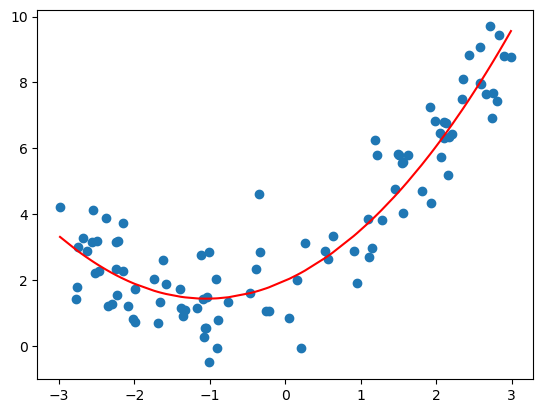

In [11]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color = 'r')

In [12]:
lin_reg2.coef_

array([0.        , 1.04387761, 0.49911635])

In [13]:
lin_reg2.intercept_

1.9872204831526583

## 关于PolynomialFeatures

In [14]:
X = np.arange(1, 11).reshape(-1, 2) #如果X不是单一特征，而是多元特征
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [15]:
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(5, 6)

In [16]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

## Pipeline

In [17]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree = 2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [19]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

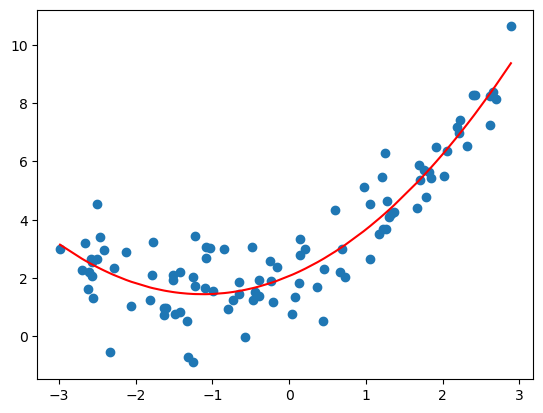

In [20]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color = 'r')